# Computer Vision for Beginners: Part 3

This is the second part of OpenCV tutorial for beginners and the complete set of the series is as follows:

- Part 1: Understanding color models and drawing figures on images 
- Part 2: The basics of image processing with filtering and gradients
- ***Part 3: From feature detection to face detection***
- Part 4: Contour detection and having a little bit of fun 

We've discussed several color modes and how to draw figures on images such as a rectangle and a circle. And then in part 2, we talked about image processing concepts such as blurring, gradient, erosion, dilation and so on. Today we are going to apply those concepts to detect features of images and face detection at the end.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir = '../'

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

# Edge Detection

**[Edge detection](https://en.wikipedia.org/wiki/Edge_detection)** means identifying points in an image where the brightness changes sharply or discontinuously. We can draw line segments with those points, which are called **edges**. Actually, we already learned one of the edge detection techniques last time. Do you remember? Gradient filtering with Sobel and Laplacian operation. By calculating the derivatives of pixel values in a given direction, gradient filtering can depict the edges of images.

**[Canny detection]()** is another type of edge detection techniques. It's one of the most popular algorithms for detecting edges, which is performed in four steps: ***Noise reduction, Finding gradient and its direction, Non-maximum suppression*** and ***hysteresis thresholding***.

The algorithm starts with Gaussian blurring and I guess we already know the reason for removing noises in images. And then it finds the intensity gradient of the image with a Sobel kernel. With the derived gradient and direction, every pixel is checked if a certain point is a local maximum in its surrounding points. If it's not, this point is suppressed to zero (total absence, black). This is called **non-maximum suppression**.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img1.png?raw=true)

If the point is considered to be a local maximum, it goes to the next stage. The final stage is the last decision stage whether the edges at the previous steps are really edges or not. This is called ***Hysteresis Thresholding*** and we need two threshold values here.

Given the two different threshold values, we get three ranges of values. So if the intensity gradient of a point is higher than the upper threshold, it will be considered as 'sure-edge.' If the gradient of a point is lower than the lower threshold, the point will be discarded. And in case of the gradient being in the middle of the two thresholds, we see its connectivity to other 'sure-edge' points. If there's no connection, it will be discarded as well.

(-0.5, 699.5, 536.5, -0.5)

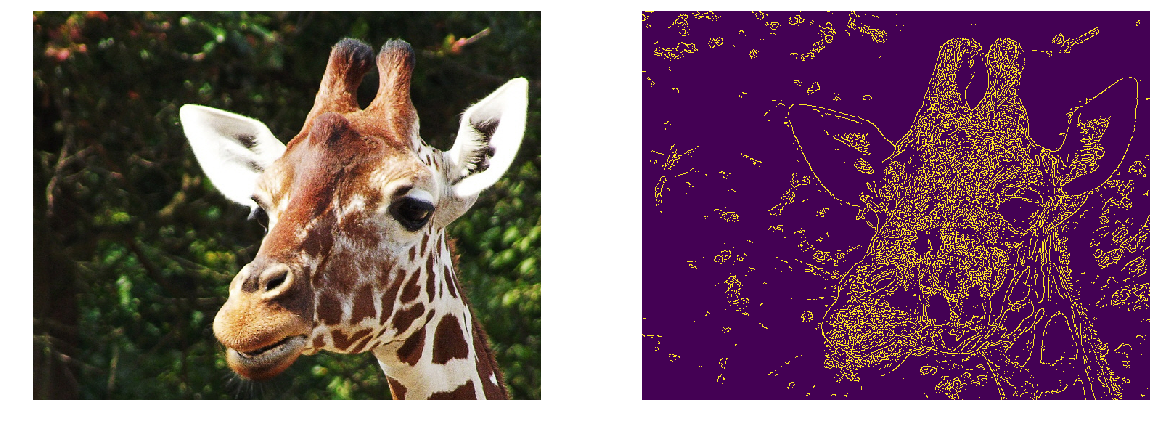

In [3]:
img = cv2.imread(dir + 'images/giraffe.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Canny detection without blurring
edges = cv2.Canny(img, threshold1=127, threshold2=127)

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')

I just used the median value for the two thresholds without blurring and the result isn't quite desirable. Now let's try different threshold values this time.

In [4]:
# Set the lower and upper threshold
med_val = np.median(img)

lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))
print("Lower: {}, Upper: {}".format(lower, upper))

Lower: 27, Upper: 50


To see how blurring can change the outcome, I'm going to apply two different sizes of kernels, (5x5) and (9x9). And I'm going to try changing the upper threshold values by adding 100. So we have 4 types of processed images as follows.

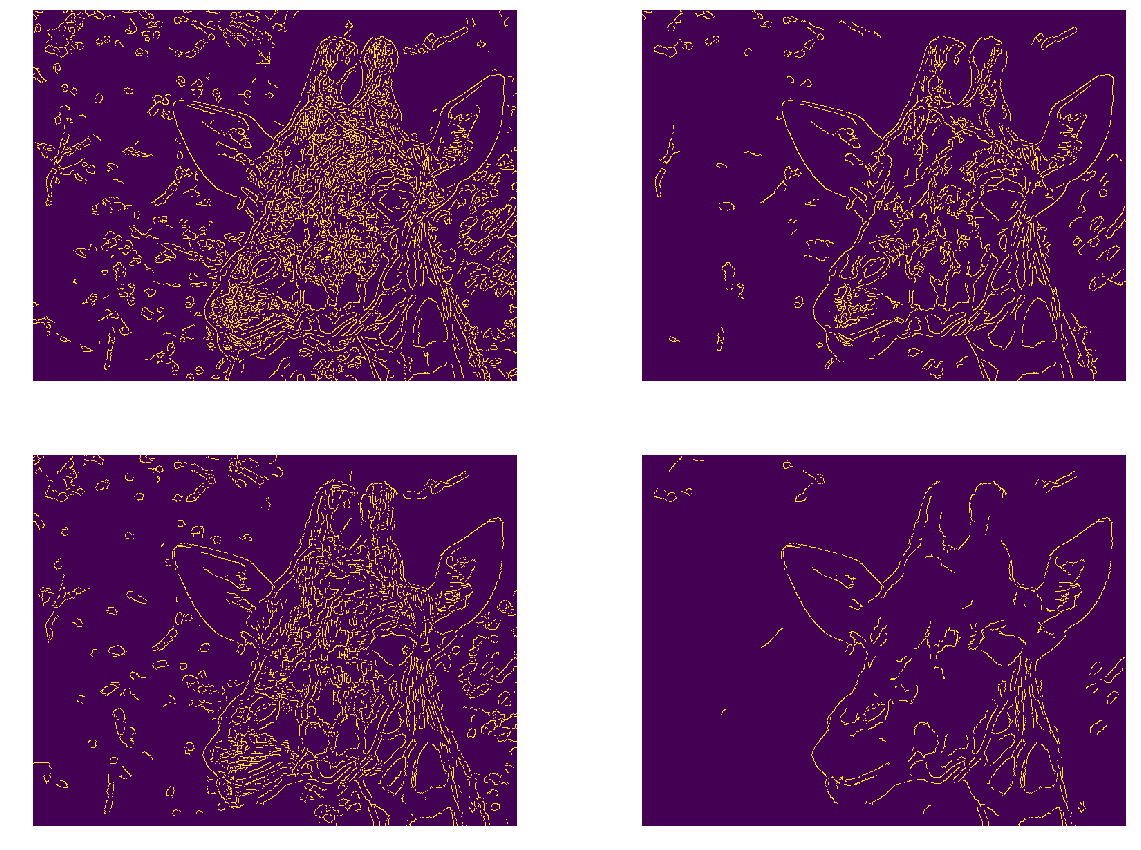

In [5]:
# Blurring with ksize = 5 
img_k5 = cv2.blur(img, ksize = (5, 5))

# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)
edges_k5_2 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper+100)

# Blurring with ksize = 9 
img_k9 = cv2.blur(img, ksize = (9, 9))

# Canny detection with different thresholds
edges_k9 = cv2.Canny(img_k9, threshold1 = lower, threshold2 = upper)
edges_k9_2 = cv2.Canny(img_k9, threshold1 = lower, threshold2 = upper+100)

# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

As you can see above, blurring helps to remove noises and we got the better result with (9x9) size of the kernel. Also, we got a better result with the higher upper threshold value.

# Contour Detection

Corner detection is another detection algorithm which is widely used in object detection, motion detection, video tracking and so on. What is a corner in image processing? How can we define a corner with pixels? We see a corner as a junction where edges intersect. Then how can we find them? Finding all edges first and then locating the points where they cross each other? Actually we have another way of making things more efficient, which are ***Harris corner detection*** and ***Shi & Tomasi corner detection***.

These algorithms work as follows. We detect points where there's a considerable change in their intensity values in all directions. And then we construct a matrix to extract eigenvalues from it. These eigenvalues are for the sake of scoring points to decide if it's a corner or not. The mathematical expressions are shown below.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img2.png?raw=tru)

Now let's see how we can implement these with codes. We first need to convert the image into grayscale. **[Harris corner detection](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)** can be performed with a function `cv2.cornerHarris()` in OpenCV.

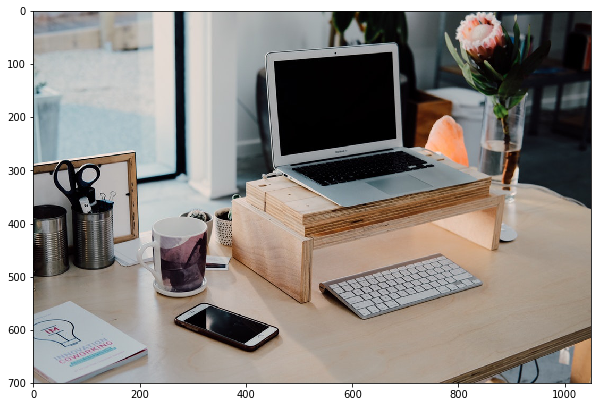

In [6]:
img = cv2.imread(dir + 'images/desk.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

In [7]:
# Convert the image into grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Change into float 
# img_gray = np.float32(img_gray)

The parameter `blockSize` is the size of the window to consider as neighborhood and `k` is Harris detector free parameter which is shown in the equation above. The result is the score R and we'll use this to detect corners.

(-0.5, 1049.5, 699.5, -0.5)

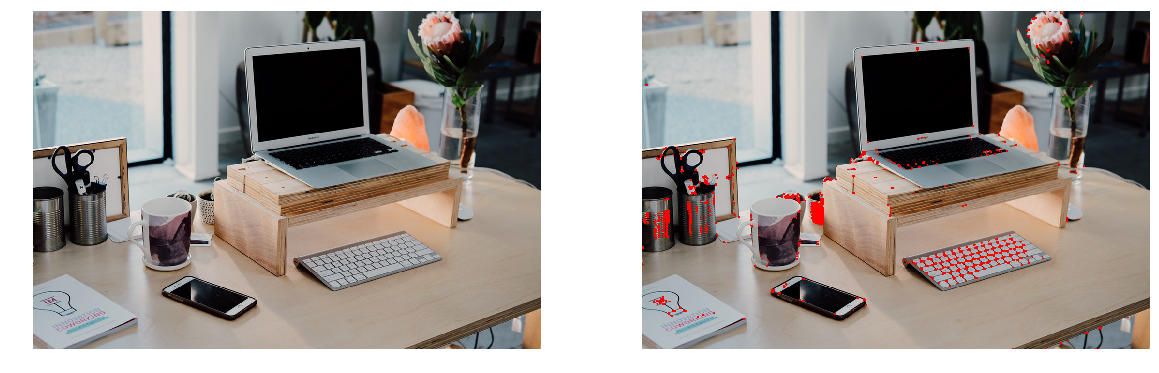

In [8]:
# Apply Harris corner detection
dst = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = .04)

# Dilate the detected corners
dst = cv2.dilate(dst, None)

# Spot the detected corners
img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]

# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

Let's try **Shi-Tomasi corner detection** this time. We can use this with a function `cv2.goodFeaturesToTrack()`. We set the maximum number of corners sorted by the most likelihood (`maxCorners`). We also assign minimum distance (`minDistance`) and minimum quality level (`qualityLevel`) that is required to be considered as corners. After we get the detected corners, we'll mark those points with circles as follows.

(-0.5, 1049.5, 699.5, -0.5)

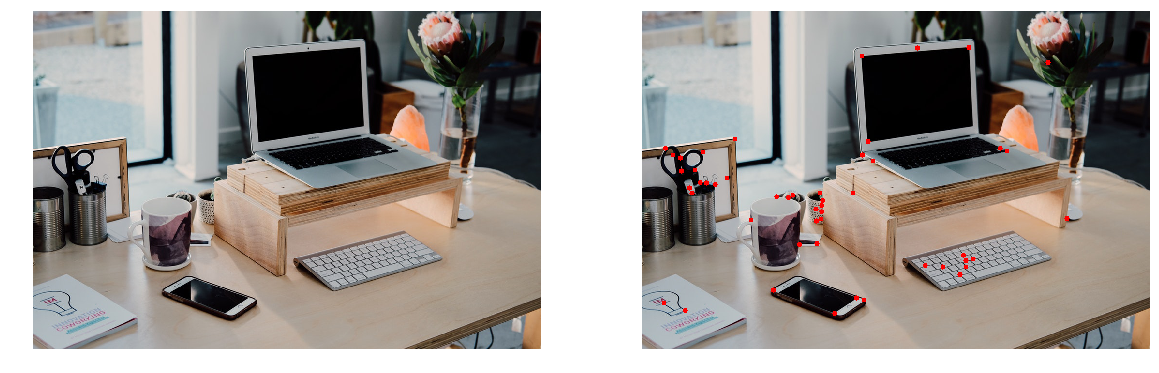

In [9]:
# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)

# Spot the detected corners
img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x,y), radius = 5, 
               color = 255, thickness = -1)

# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

# Face Detection

The last feature we're going to see is a face. **[Face detection](https://en.wikipedia.org/wiki/Face_detection)** is a technology identifying the presence and the position of human faces in digital images. I want you to differentiate face detection from **[face recognition](https://en.wikipedia.org/wiki/Facial_recognition_system)** which indicates detecting the identification of a person by his or her face. So face detection can't tell us to whom the detected face belongs.

Face detection is basically a classification task so it's trained to classify whether there is a target object or not. And ***Haar Feature-based Cascade Classifier*** is one of the face detection models available in OpenCV. This is a pre-trained model, which means it already completed training with thousands of images. The 4 key points for understanding this algorithm are ***Haar features extraction, integral image, Adaboost*** and ***cascade classifiers***.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img3.png?raw=tru)

***[Haar-like features](https://en.wikipedia.org/wiki/Haar-like_feature)*** are image filters or image kernels used in object detection and the examples are shown above. They owe their name to their intuitive similarity with Haar wavelets which is originally proposed by [Alfréd Haar](https://en.wikipedia.org/wiki/Alfr%C3%A9d_Haar). During detection, we pass the window on an image and do the convolutional operation with the filters to see if there's the feature we're looking for is in the image. Here is **[the video](https://vimeo.com/12774628)** which visualizes how the detection works.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img4.png?raw=tru)

So how we decide whether there is a wanted feature or not in a given area? Let's take a look at the picture above. We have a kernel whose upper half is dark and lower half is light. Then we get the mean of the pixel values for each region and subtract the gap between the two. If the result is higher than a threshold, say 0.5, then we conclude there's the feature we're detecting. We repeat this process for each kernel while sliding the window over the image.

Although this isn't a complex calculation, the total amount of computation becomes huge when we consider it in a whole image. If you've seen the video mentioned above, you'd get an intuition into the amount of calculation involved. And this is where an **[integral image](https://en.wikipedia.org/wiki/Summed-area_table)** comes into play. The integral image is a way of image representation which is derived to make the feature evaluation faster and more effective.

As you can see below, there are the pixels of an image on the left and an integral image on the right. Starting from the left upper point, it computes the accumulated sum of pixels under a given rectangular area. On the integral image, the sum of the pixels in the box with the dashed line is written at the lower right point of the box on the right.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img5.png?raw=tru)

With this pre-calculated table, we can simply get the summed value for a certain area by the values of sub-rectangles (the red, orange, blue and purple box).

So we solved the computational cost with the integral image. But we're not done yet. Think about when the detecting window is at the blank background where there's no object or face. It'll still be a waste of time if it performs the same process in such a part. And there's another kick making this detector faster. Implementing a **[cascade classifier](https://en.wikipedia.org/wiki/Cascading_classifiers)** with Adaboost!

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part3_img6.png?raw=tru)

A cascade classifier constructs stepwise stages and gives an order among Haar-like features. Basic forms of the features are implemented at the early stages and the more complex ones are applied only for those promising regions. And at each stage, the Adaboost model will be trained by ensembling weak learners. If a subpart, or a sub-window, is classified as 'not a face-like region' at the prior stage, it's rejected to the next step. By doing so, we can only consider the survived ones and achieve much higher speed.

## Where's our hero?

To make this tutorial more interesting, I'd like to implement this Cascade classifier to detect the face of our marvel heroes. (Machine learning should be fun, don't you think? 😃😃) Let's bring Captin Marvel as our first guest.

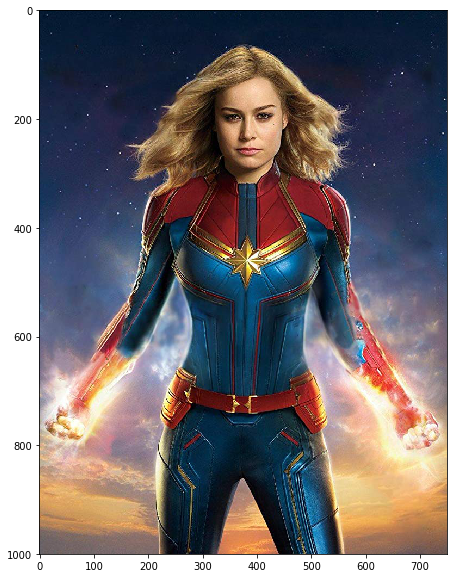

In [10]:
cap_mavl = cv2.imread(dir + 'images/captin_marvel.jpg')
cap_mavl = cv2.cvtColor(cap_mavl, cv2.COLOR_BGR2RGB) 
display(cap_mavl)

We're going to use only the part of this image. So let's get the region of interest around her face first and then convert the image into grayscale. The reason for using only one channel is because we're only interested in the changes in the light intensity of the features.

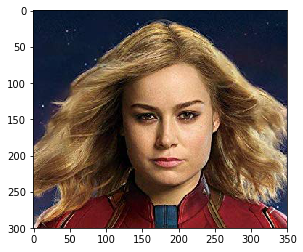

In [11]:
# Find the resion of interest
roi = cap_mavl[50:350, 200:550]
plt.imshow(roi)

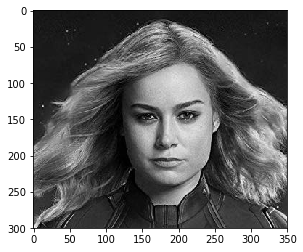

In [12]:
# Convert the roi to grayscale
roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
plt.imshow(roi, cmap = 'gray')

In [13]:
# Load Cascade filter 
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

Next, we're going to create a function detecting a face and drawing a rectangle around it. To detect the face, we can use the method `.detectMulitiScale()` of the classifier `face_cascade` that we loaded above. It returns the four points of the identified region so we'll draw a rectangle at that position. `scaleFactor` is a parameter for how much the image size is reduced at each image scale and `minNeighbors` for how many neighbors each candidate rectangle should be trained. Now let's apply this function to the image and see the result.

In [14]:
# Create a function drawing a rectangle around the detected face 
def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy, scaleFactor = 1.1, minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

(-0.5, 349.5, 299.5, -0.5)

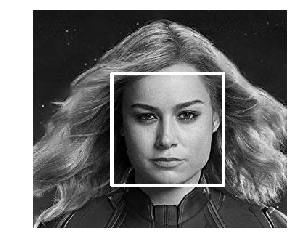

In [15]:
# Detect the face 
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.axis('off')

Great! I think this is quite satisfactory. Why don't we call other heroes altogether this time? We can implement this classifier to an image with multiple faces as well.

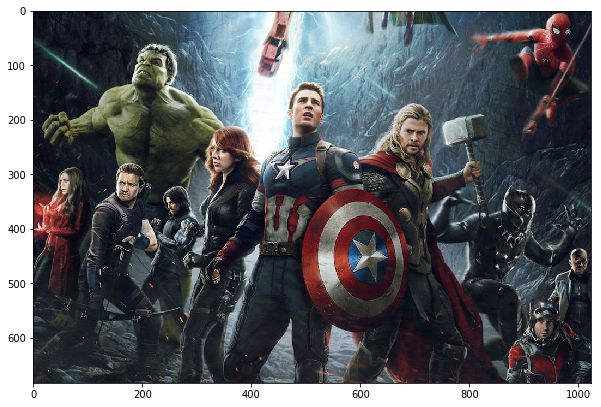

In [16]:
avengers = cv2.imread(dir + 'images/avengers.jpg')
avengers = cv2.cvtColor(avengers, cv2.COLOR_BGR2RGB)
display(avengers)

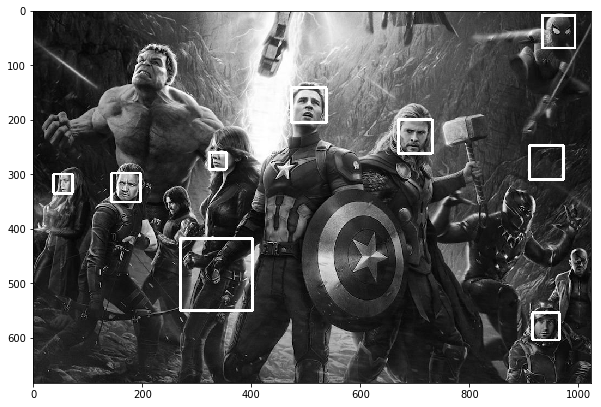

In [17]:
avengers = cv2.cvtColor(avengers, cv2.COLOR_RGB2GRAY)
detected_avengers = detect_face(avengers)
display(detected_avengers, cmap = 'gray')

And yes, it sometimes makes a failure catching a 'non-face' object or missing a 'real-face.' It's funny that it detected Spider-Man successfully while mistook the hands of Captin America and Black Widow as eyes. We usually get better results with a face looking in front and showing its forehead and eyes clearly.

# Want to try yours?

Would you like to try yours with a Webcam? We can apply the same process. Save the following code scrip as a file and import it on your terminal. If you're to use Jupyter notebook, put the codes in one cell and execute. You can shut down the window by pressing ESC.

In [8]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

Did it successfully detect your face? Hope it doesn't select your nostrils for eyes. 😅

# What's next?

Did you enjoy the story? Besides the front face classifier, there are various models for eyes, upper body, lower body and so on. You can also try the model detecting a Russian car number plate. So I'd recommend you to play with it as well.

Would you like to test your understanding on image processing? Try this **[25 Questions of image processing](https://www.analyticsvidhya.com/blog/2017/10/image-skilltest/)**. And here are such great articles providing detailed explanations for the questions you should check. 
- My take on 25 Questions to test a Data Scientist on Image Processing with Interactive Code for [Part 1](https://towardsdatascience.com/my-take-on-25-questions-to-test-a-data-scientist-on-image-processing-with-interactive-code-part-1-a6196f535008) & [Part 2](https://towardsdatascience.com/my-take-on-25-questions-to-test-a-data-scientist-on-image-processing-with-interactive-code-part-2-77eacfd96cf9)